Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Yotube video: https://www.youtube.com/watch?v=JiK9_u6lFZs&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=7

# Classification (Pytorch, Iris Dataset)

In [1]:
import pandas as pd
import torch
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
iris_data = load_iris()
X_iris = iris_data.data
y_iris = iris_data.target

In [4]:
X_iris.shape

(150, 4)

In [5]:
X_iris[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris,test_size=0.3,random_state=10)

In [7]:
X_train.mean(axis=0), X_test.mean(axis=0)

(array([5.84285714, 3.08571429, 3.72380952, 1.18285714]),
 array([5.84444444, 2.99111111, 3.83777778, 1.23777778]))

In [8]:
X_train.std(axis=0), X_test.std(axis=0)

(array([0.81531264, 0.44259593, 1.77257004, 0.76810926]),
 array([0.84814977, 0.40706113, 1.72566108, 0.73825286]))

In [10]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
X_train.mean(axis=0), X_test.mean(axis=0)

(array([-2.83159739e-15,  1.67557767e-15, -5.07530526e-17,  6.34413157e-17]),
 array([ 0.00194686, -0.21374615,  0.06429549,  0.07150107]))

In [12]:
X_train.std(axis=0), X_test.std(axis=0)

(array([1., 1., 1., 1.]),
 array([1.04027551, 0.91971278, 0.97353619, 0.96113001]))

In [13]:
class NetModel(nn.Module):
    def __init__(self, input_dim, nclass,layer_size=[32,64],dropout=0.3):
        super(NetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, layer_size[0])
        self.fc2 = nn.Linear(layer_size[0], layer_size[1])
        self.fc3 = nn.Linear(layer_size[1], nclass)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, X):
        X = self.dropout1(self.relu1(self.fc1(X)))
        X = self.dropout2(self.relu2(self.fc2(X)))
        X = self.softmax(self.fc3(X))
        return X

In [14]:
class Dataset(torch.utils.data.Dataset):
    
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X) 
        self.y = torch.LongTensor(y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
    def __len__(self):
        return len(self.y)

In [15]:
batch_size = 32

train_d = Dataset(X_train, y_train)
test_d = Dataset(X_test, y_test)

train_dl = DataLoader(train_d, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_d, batch_size=batch_size, shuffle=False)

n_train=X_train.shape[0]
n_test=X_test.shape[0]

In [63]:
next(iter(train_dl))

[tensor([[-0.7885,  0.7101, -1.3110, -1.2796],
         [-0.9111,  0.4842, -1.1417, -0.8890],
         [ 0.9287, -0.1937,  0.3815,  0.2827],
         [ 0.1927, -2.0012,  0.7200,  0.4129],
         [-1.2791, -0.1937, -1.3110, -1.1494],
         [-1.2791, -0.1937, -1.3110, -1.4098],
         [-1.0338, -0.1937, -1.1982, -1.2796],
         [-1.1564,  1.1620, -1.3110, -1.4098],
         [ 0.6833,  0.2582,  0.8892,  1.4544],
         [ 1.0513, -0.1937,  0.7200,  0.6733],
         [-0.9111, -1.3234, -0.4083, -0.1079],
         [-0.0526,  2.0657, -1.4238, -1.2796],
         [-1.8924, -0.1937, -1.4802, -1.4098],
         [-1.0338, -1.7752, -0.2391, -0.2381],
         [ 0.8060, -0.6455,  0.4943,  0.4129],
         [-0.7885,  2.2917, -1.2546, -1.4098],
         [ 1.0513, -0.1937,  0.8328,  1.4544],
         [ 2.1552, -0.1937,  1.6226,  1.1940],
         [-1.2791,  0.0323, -1.1982, -1.2796],
         [-0.0526, -0.8715,  0.7764,  0.9336],
         [ 0.8060,  0.2582,  0.7764,  1.0638],
         [ 0.

In [16]:
train_d.__len__()

105

In [17]:
len(train_d)

105

In [18]:
X_train.shape

(105, 4)

In [19]:
len(train_dl)

4

In [20]:
model=NetModel(input_dim=4, nclass=3,layer_size=[32,64], dropout=0.1).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [21]:
print(model)

NetModel(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
  (relu1): ReLU()
  (relu2): ReLU()
  (softmax): Softmax(dim=1)
)


In [22]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

In [23]:
epochs=15
    
for epoch in range(epochs):

    acc_train = 0
    loss_train = 0

    for X,y in tqdm(train_dl):

        X = X.to(device)
        y=y.to(device)
                
        output = model(X)
                
        loss = criterion(output, y)
        loss_train += loss.item()
                
        acc = (output.argmax(dim=1) == y).sum().item()
        acc_train += acc

        model.zero_grad()
        loss.backward()
        optimizer.step()
            
        acc_val = 0
        loss_val = 0
        model.eval()
        with torch.no_grad():
            for X,y in test_dl:
                X = X.to(device)
                y=y.to(device)
                
                output = model(X)
                
                loss = criterion(output, y)
                loss_val += loss.item()
                
                acc = (output.argmax(dim=1) == y).sum().item()
                acc_val += acc
            
    loss_train=loss_train/n_train
    loss_val=loss_val/n_test
    acc_train=acc_train/n_train
    acc_val=acc_val/n_test
    loss_train_list.append(loss_train)
    loss_val_list.append(loss_val)
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)
    print(f'Epochs: {epoch + 1} | Train Loss: {loss_train: .3f} \
| Train Accuracy: {acc_train: .3f} | \
Val Loss: {loss_val: .3f}\
| Val Accuracy: {acc_val: .3f}')

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 143.70it/s]


Epochs: 1 | Train Loss:  0.040 | Train Accuracy:  0.524 | Val Loss:  0.044| Val Accuracy:  0.756


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 870.14it/s]


Epochs: 2 | Train Loss:  0.037 | Train Accuracy:  0.819 | Val Loss:  0.039| Val Accuracy:  0.667


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 737.04it/s]


Epochs: 3 | Train Loss:  0.033 | Train Accuracy:  0.762 | Val Loss:  0.035| Val Accuracy:  0.711


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 971.58it/s]


Epochs: 4 | Train Loss:  0.031 | Train Accuracy:  0.771 | Val Loss:  0.033| Val Accuracy:  0.733


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 762.50it/s]


Epochs: 5 | Train Loss:  0.028 | Train Accuracy:  0.838 | Val Loss:  0.032| Val Accuracy:  0.844


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 779.90it/s]


Epochs: 6 | Train Loss:  0.026 | Train Accuracy:  0.876 | Val Loss:  0.030| Val Accuracy:  0.956


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 969.39it/s]


Epochs: 7 | Train Loss:  0.026 | Train Accuracy:  0.933 | Val Loss:  0.030| Val Accuracy:  0.956


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 823.42it/s]


Epochs: 8 | Train Loss:  0.025 | Train Accuracy:  0.943 | Val Loss:  0.030| Val Accuracy:  0.933


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 697.60it/s]


Epochs: 9 | Train Loss:  0.025 | Train Accuracy:  0.943 | Val Loss:  0.029| Val Accuracy:  0.933


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 898.43it/s]


Epochs: 10 | Train Loss:  0.024 | Train Accuracy:  0.933 | Val Loss:  0.029| Val Accuracy:  0.911


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 821.85it/s]


Epochs: 11 | Train Loss:  0.024 | Train Accuracy:  0.952 | Val Loss:  0.029| Val Accuracy:  0.911


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 866.91it/s]


Epochs: 12 | Train Loss:  0.023 | Train Accuracy:  0.952 | Val Loss:  0.029| Val Accuracy:  0.911


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 791.90it/s]


Epochs: 13 | Train Loss:  0.023 | Train Accuracy:  0.952 | Val Loss:  0.028| Val Accuracy:  0.956


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 827.16it/s]


Epochs: 14 | Train Loss:  0.023 | Train Accuracy:  0.952 | Val Loss:  0.028| Val Accuracy:  0.956


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 886.14it/s]

Epochs: 15 | Train Loss:  0.023 | Train Accuracy:  0.952 | Val Loss:  0.028| Val Accuracy:  0.956


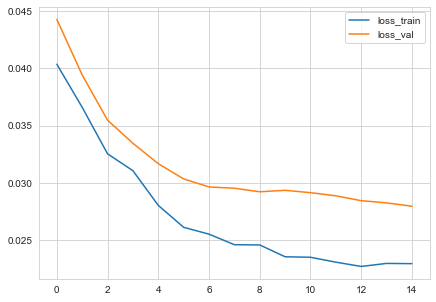

In [24]:
plt.figure(figsize=(7, 5))
plt.plot(np.arange(len(loss_train_list)), loss_train_list, label = 'loss_train')
plt.plot(np.arange(len(loss_val_list)), loss_val_list, label = 'loss_val')
plt.legend(loc='upper right')
plt.show()